In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.drop(['id' , 'Unnamed: 32'],axis=1, inplace=True)

In [6]:
data['diagnosis'].replace("M", 0, inplace=True)
data['diagnosis'].replace("B", 1, inplace=True)

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

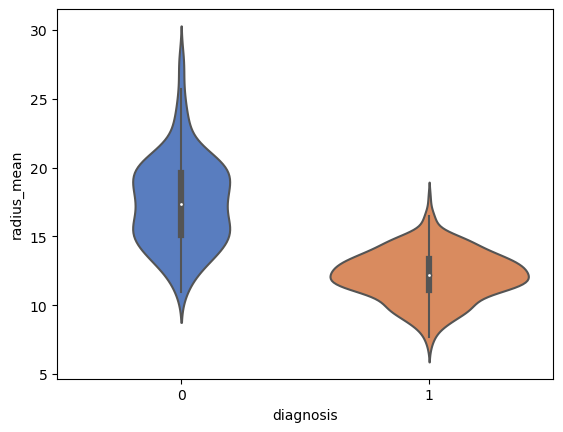

In [7]:
sns.violinplot(x='diagnosis', y='radius_mean', data=data, palette='muted')

<Axes: >

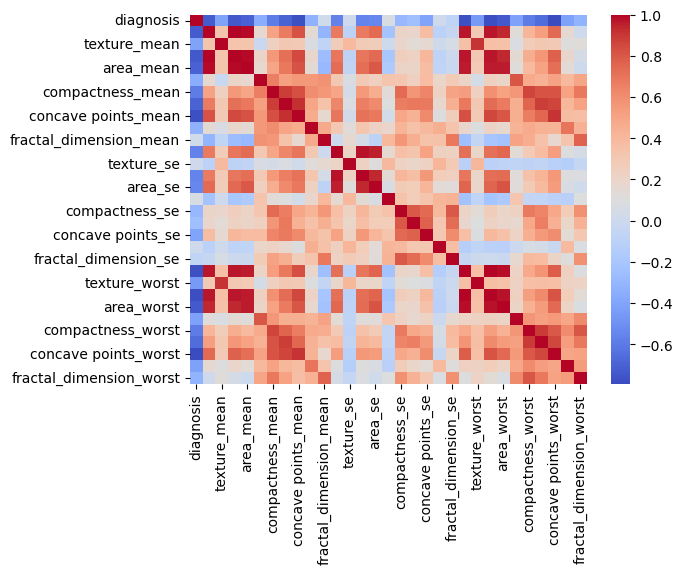

In [8]:
corr = data.corr()
sns.heatmap(corr,cmap='coolwarm', annot=False)

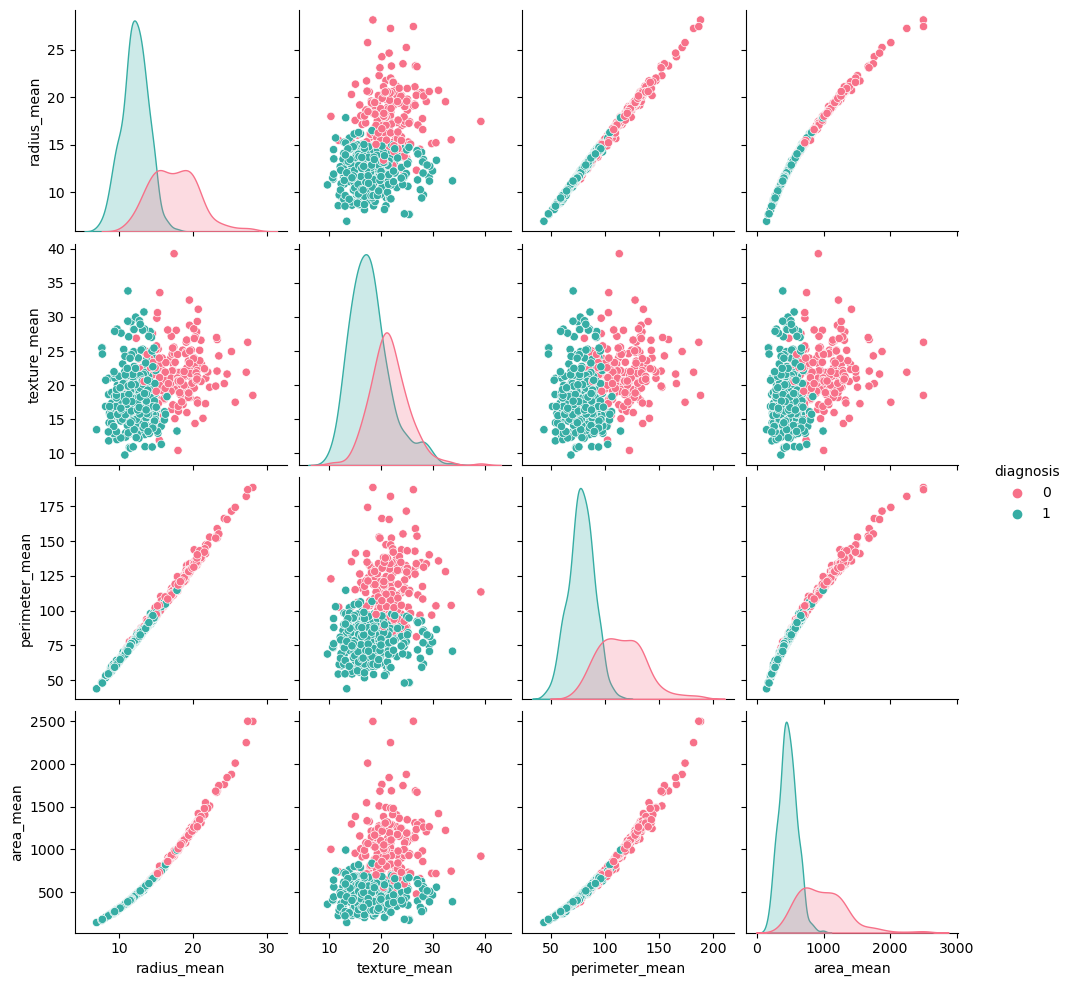

In [10]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(data[selected_features], hue='diagnosis', palette='husl')
plt.show()

In [11]:
y=  data.diagnosis.values
x_data = data.drop('diagnosis', axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

/Users/tarun/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tarun/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tarun/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [13]:
print("xtrain:{}".format((x_train).shape))
print("ytrain:{}".format((y_train).shape))
print("xtest:{}".format((x_test).shape))
print("ytest:{}".format((y_test).shape))

xtrain:(398, 30)
ytrain:(398,)
xtest:(171, 30)
ytest:(171,)


In [14]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=200)
lgr.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [15]:
lgr.score(x_test, y_test)

0.9532163742690059

In [16]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = lgr.predict(x_test)
cm = confusion_matrix(y_true, y_pred)

<Axes: >

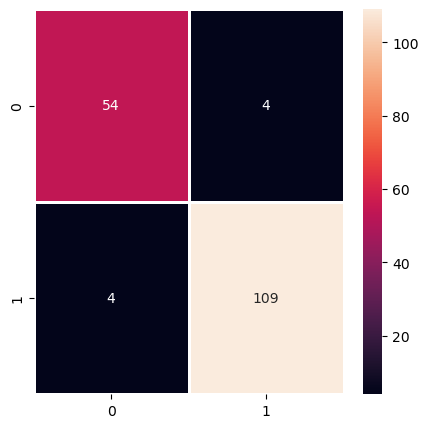

In [17]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth = 1, fmt='.0f', ax=ax)